# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

While running the simulation with the default, unmodified code, I observed that the Smartcab does not move. The rewards ranged between -6 and 5. A positive reward was given when the light is red, since the car is not supposed to move through a red light.  However, negative rewards were given when the light was green and there was no oncoming traffic. The other cars seemed to obey the traffic signals, although occasionally a positive reward would be given during a green light since there was oncoming traffic. The cars were all driving on the right side of the road, and there were no complications such as pedestrians, parked cars, or cyclists. Despite not moving, the smart cab did not cause a traffic jam.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- In the "agent.py" file:
  - The "grid_size" flag determines the size of world; (x,y) produces a world with x rows of streets and y columns of streets (default of 8,6)
  - Setting the "enforce_deadline" flag to True creates a countdown when running the simulation. For each intersection between its starting positon and its destination, the agent receives 5 "time steps" to reach its destination. In practice, this means the agent usually has 20 or 25 turns to reach its destination.
  - The "update_delay" controls the speed at which the simulation is carried out. Setting this flag to a low value (below the default of 2.0) greatly speeds up the simulation
- The "act" method is called on the Environment class when the agent performs an action
- In the "simulator.py" file, the "render_text()" function outputs the results of the simulation to the console as text, while the "render()" function creates the graphical output
- In the "planner.py" file, the "next_waypoint()" function will first consider the East-West direction, before considering the North-South direction

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


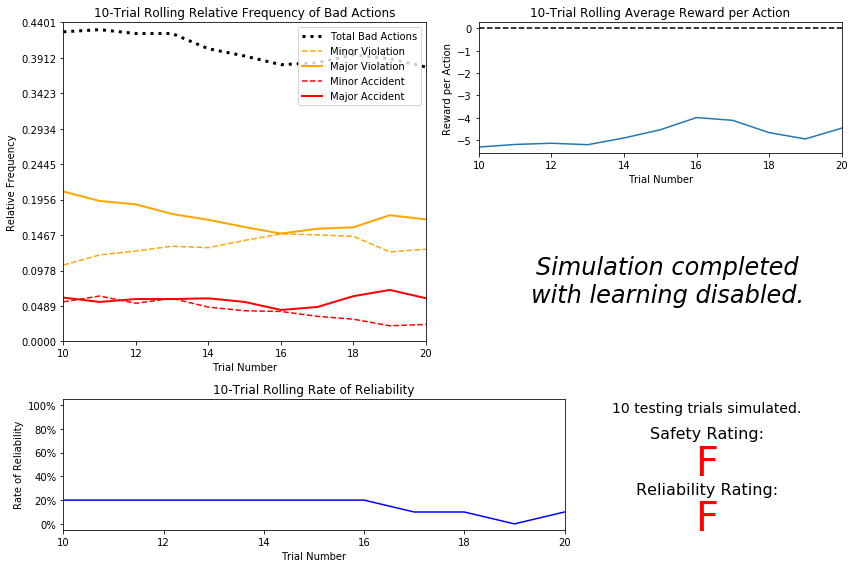

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

It appears that the agents is making decisions over one third of the time. Considering that the agent only has to choose from among four actions, that is quite frequent. About 5% of its actions lead to minor accidents, and 5% lead to major accidents. This means that about 30% ( (1/10) / (1/3)) of its bad actions lead to an accident.

Given that the agent is driving randomly, it makes sense that it's reliability is around the 10%-20% level. There 8 * 6 = 48 intersections, so one can expect the cab to almost never reach the destination on time if it is choosing an action randomly.

The agent is receiving around -4 reward points per action on average. It seems like the agent is receving quite a high penalty.

As the number of trials increases, the outcome of the results do not really change. This makes sense, since the agent is not learning or adapting.

The smartcab has received a "F" rating in both reliablity and safety. This makes sense, since it is driving around randomly, getting into many accidents and never reaching its destination on time.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

I think that the "inputs" feature is the most important for learning __safety__. This is because it will allow the Smartcab to avoid turning when there are nearby cars that might hit it due to the turn. It will also allow the Smartcab to avoid hitting turning cars. However the "inputs" feature is really four features. Of these four features, I believe that "light", "left", and "oncoming" are necessary for learning safe policies. I don't believe that the "right" feature is necessary. This is because I observed after running the unmodified code that the cars travelled on the right side of the road. It seems that in this environment one can expect cars to the right to be travelling away and it should not necessary to use the "right" sensory data. However in real life this would be a bad idea, since there can be pedestrians or cyclists to the right, or even cars travelling the wrong way. 

The "waypoint" feature seems like the most important feature for __efficiency__. This is because always following the waypoint direction should result in the Smartcab reaching its destination in the minimum amount of time, provided it avoids accidents. I believe that combination of the "waypoint" and "inputs" feature should be enough for the Smartcab to learn policies that are both safe and efficient.

I do not believe that "deadline" feature is necessary for the Smartcab to learn policies that are safe and efficient. I cannot fathom the possibility that the number of actions remaining for the Smartcab to reach the destination before running out of time would affect the likelihood of it getting into accidents, and while in real life it might encourage a driver to speed up, that  isn't an option in this simulated environment. I suppose that the cab could start running red lights in order to meet its deadline, but it seems like a bad idea in general and might lead to more accidents.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
I selected "inputs:light", "inputs:left", "inputs:oncoming", and "waypoint" features. They can take on the following possible values:

  - _waypoint_: left, right, forward (3 in total)
  - _input:light_: red, green (2 in tota)
  - _input:left_: left, right, forward, None (4 in Total)
  - _input:oncoming_: left, right, forward, None (4 in Total)

Therefore, there are 96 (3 x 2 x 4 x 4) possible states for the Smartcab to be in. I think that it is possible for the Smartcab to learn a policy for each possible state within a reasonable trials. 96 states is not that many when one considers the evironment's simplicity and the speed at which it executes. With a default size of 8X6, the destination can be at most 12 moves away from the Smartcab. Based on the "environment.py", the Smartcab will start at least 4 intersections (moves) away from its destination. However given traffic conditions and lights, one can expect the Smartcab to be occasionally be idling, even with ideal policies. The Smartcab is accorded a maximum of 5 "time steps" per initial distance from the destination. When one factors in the necessary exploration, it would reasonable to expect the average training trial to take around 20 time steps before completing. If one assumes that each state is seen with equal probability, it will take around 50 trials before we are virtually guaranteed that we see each state at least once. Of course, not all states will occur with equal probability. However it is clear that 96 states is a reasonable amount.       


In [3]:
3 * 2 * 4 * 4

96

In [4]:
import random
import numpy as np
states = np.arange(96)

trials = [10,25,50, 100, 150, 200, 250, 500]

def check_coverage(repeats,n_trials,states):
    proportion = 0.0
    n_states = float(states.shape[0])
    for i in range(repeats):
        sample = np.random.choice(states,size=(n_trials*20), replace = True)
        repeat_proportion = np.unique(sample).size / n_states
        proportion += repeat_proportion/repeats
    return proportion


for trial in trials:
    proportion = check_coverage(100,trial,states)
    print "{} trials gives {:.5%} coverage".format(trial, proportion)

10 trials gives 87.08333% coverage
25 trials gives 99.40625% coverage
50 trials gives 100.00000% coverage
100 trials gives 100.00000% coverage
150 trials gives 100.00000% coverage
200 trials gives 100.00000% coverage
250 trials gives 100.00000% coverage
500 trials gives 100.00000% coverage


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

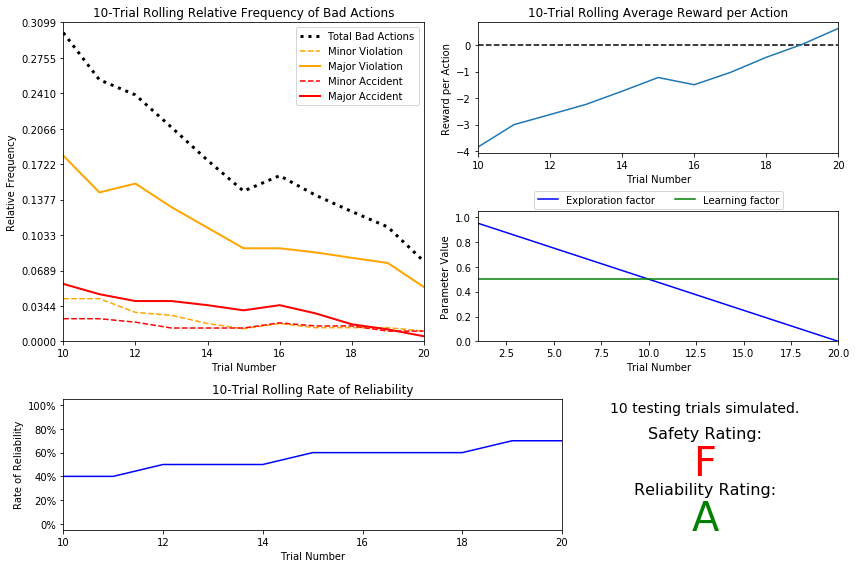

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
There does not appear to be much similarity between these results and the results from the basic driving agent. The above results show that there is a steady decline in the relative frequency of bad actions over time with the Q-Learning agent. This did not occur with the basic driving agent. In fact, there appears to be a steady improvement in the all the results of the Q-Learning agent over time, in contrast to the relatively stable and bad results of the basic driving agent. This is apparent in the steady increase in the rolling rate of reliablity, the steady increase in average reward per action and the decrease in the bad actions over itme.

20 training trials were completed before the testing of the agent started. This makes sense, since the default epsilon tolerance of 0.05 was used and it declined from 1.0 at a rate of 0.05 per trial. One can observe this steady, linear decline in the parameters panel.

Overall, the Q-Learning agent received a 'A' for reliability and a 'F' for safety, in contrast to two 'F's for the basic driving agent. It is not surprising that the Q-Learning outperformed the basic, random agent, but it seems like a fluke that it did so well on the reliability rating and so badly on safety. The rolling rate of reliability was only around the 70% mark before testing commenced. A single major accident will lead to the agent receiving a 'F' on safety. Therefore it would seem necessary to increase the number training trials so that the Q-Learning agent can learn better to avoid accidents and reach the destination on time.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

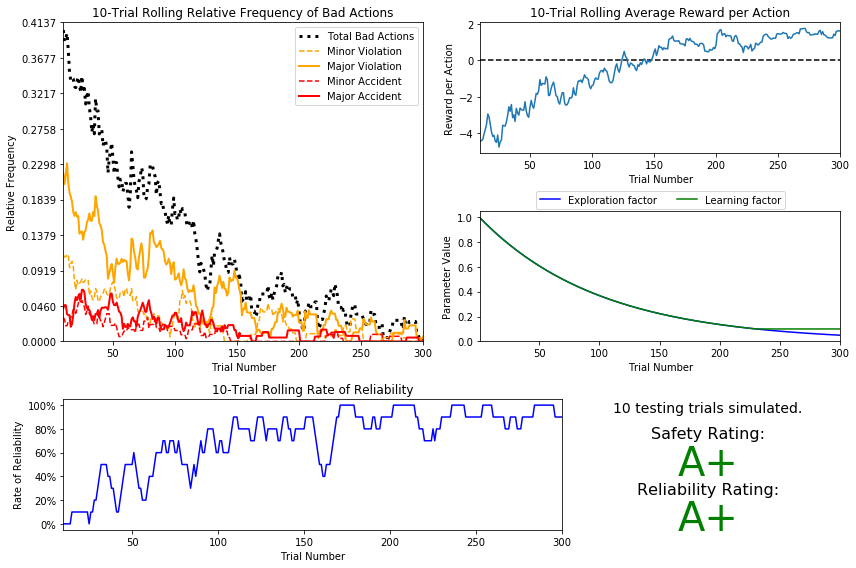

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I used an exponential decay function of: $$\epsilon = e^{-0.01 * t}$$
I use a constant value of 0.01 instead of _a_ because I also decided to use a decaying function for _a_ of:$$ max(a = e^{-0.01 * t},0)$$

I used these values because after some experimentation I found that approximately 300 trials were required to obtain satisfactory results. With the default tolerance of 0.05, I obtained the 300 training trials that I desired. I decided that a decaying alpha was appropiate because I wanted the agent to quickly update the initial Q-values, and only to update these new Q-values at a decreasing rate over time. I used the max function because I wanted to avoid _a_ declining close to 0, which would mean that the agent had stopped learning.

This Q-Learner has obtained much better results than the default learner from the previous section, with a 'A+' in safety and a 'A+' in reliability, compared to a 'F' in safety and a 'A' in reliability obtained by the basic Q-learner. These are quite satisfactory results, and the 'A+' that was awarded for safety indicated that the agent always choose the correct action and did not commit any violations. The 'A+' it received in reliability indicates that the smartcab always reached its destination on time during the testing trials.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:**
Since we know that the agent should learn to obey U.S. right-of-way traffic laws and also follow the waypoint then an optimal policy would be along the lines:
  - Don't turn left or go forward on a red light
  - Turn right on a red light if the waypoint is 'right' and the traffic on the left is turning
    - Don't move if traffic on left is going forward, wait for traffic to clear
  - Go forward on a green light if the waypoint is 'forward'
  - Fo right on a green light if the waypoint is 'right'
  - Go left if waypoint if 'left', light is green, and there is no oncoming traffic or it is turning left
    - Don't turn if there is oncoming traffic, wait for for traffic to clear
    
Following the above rules should lead to the agent reaching the destination in the minimum amount of time while avoiding traffic violations and accidents. It would have been easier to just hardcode the above rules rather than learning policies.

After looking at the 'sim_improved-learning.txt', it appears that there are many states agent has learned to go in different direction from the waypoint. However, at least these moves are safe and valid actions. I defined the state variable as: waypoint, inputs['light'], inputs['left'], inputs['oncoming']. So for the following policy:

('right', 'green', 'forward', 'right')
- forward : 0.49
- right : 0.00
- None : -3.25
- left : 0.00

The agent should choose to go right in the above state, but will instead choose the action of 'forward', since it has a higher Q-value. Even though 'forward' is not the optimal action, is still has a positive value since the agent can receive an award of up to 2.0 even if it does not follow the waypoint. In this case, it appears that the Smartcab never turned right during training when in this state, since the 'right' action has a value of 0. The only way of solving this would have been to have been to increase the number of training trials.

An example of where the agent has learned the correct policy:

('right', 'green', 'right', 'forward')
- forward : -0.01
- right : 1.66
- None : 0.00
- left : -6.33
 
Here, the Smartcab will turn right. This is the correct action, since it is the direction of the waypoint. It is also a legal and safe action because it has a green light.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

There is no need and no point in incorporating the expected future reward from an action for this reinforcement learning project for a few reasons. First of all, the Smartcab does not receive information on how far away from its destination it is. Instead, it has the 'waypoint' feature which tells it the direction to travel in order to reach the destination in the minimum amount of time. If it did not have such a convenient feature, but instead had the relative position of the destinaton compared to itself, or the Smartcab's current intersection and ther intersection of its destination, it would be important to incorporate future rewards. In such a scenario, we would want the Smartcab to learn to decrease the distance between itself and its destinaton. Therefore it would be appropiate to using the gamma parameter to discount the estimated future award of an action. Presumably in such a scenario, the Smartcab would only receive a reward once it reached its final destination. Therefore we would have to take this single, 'lump sum', reward and somehow propograte it back to all the previous actions it took to reach the final destination. The use of gamma parameter combined with the estimate of the future award of an action would allow this.

However, in addition to the Smartcab not knowing how far it is from its destinaton, the environment does not currently reward the agent for reaching its destinaton. Instead, it rewards the agent for following the waypoint. The agents actions don't really have an impact on the rewards it can receive in the next state. It is always possible for the agent to follow the waypoint and receive an reward, conditional on it obeying traffic laws. The Smartcab does not receive any information that would allow it to predict the kind of traffic conditions that its actions will lead to. Therefore it does not make any sense to try attribute future possible rewards to an action in the current state, since they are not directly related. If we wanted to use the gamma parameter, it would be necessary to change how the rewards are assigned.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.